In [1]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
board_size = 30

In [356]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Conv2d(1, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=1),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=2),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, 3, stride=2),
#             nn.BatchNorm2d(256),
#             nn.ReLU(),
            nn.Conv2d(256, 256, 3, stride=2),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        return self.layers(x)

In [357]:
mlp = MLP()
# mlp = torch.load("model")
# mlp.train()
losses = []
train = []
running_loss = 1

In [358]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(mlp.parameters(), lr=1e-3)

In [359]:
batch_size = 32

for epoch in range(1000):
    dataset, moves, length = game_sim()
    
    for sample in dataset:
        rand = int(np.random.rand() * len(train))
        sample.append(length/900)
        train.append(sample)
        if len(train) > 1000:
            train.remove(train[rand])
    
    batch = torch.zeros(1, 1, 30, 30)
    labels = torch.zeros(batch_size, 1)
    
    for i in range(batch_size):
        rand = int(np.random.rand() * len(train))
        sample = train[rand][:len(train[rand]) - 1]
        labels[i] = train[rand][len(train[rand]) - 1:][0]
        board = torch.zeros(board_size, board_size)
        for number, tupl in enumerate(sample):
            board[tupl] = ((number + 1)/len(sample))
        batch = torch.cat([batch, board.view(1, 1, 30, 30)], dim=0)
        
    batch = torch.cat((batch[:0], batch[0+1:])) # remove first row
    optimizer.zero_grad()
    outputs = mlp(batch) #(length, moves)
    loss = loss_function(outputs, labels)
    running_loss = (running_loss * 0.9) + (loss.item() * 0.1)
    print(running_loss)
    losses.append(running_loss)
    loss.backward()
    optimizer.step()
        


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x36864 and 256x64)

In [66]:
# torch.save(mlp, "model")

In [345]:
snake = [(14, 14)]
mlp.eval()
while True:
    while True:
        apple = (int(np.random.rand(1) * board_size), int(np.random.rand(1) * board_size))
        if apple not in snake:
            break
    pathington = BFS(snake[0], apple, snake, 1)
    if len(pathington) == 0:
        print(len(snake))
        break
    lowest_index = 0
    lowest_score = -10000
    for i, path1 in enumerate(pathington):
        board = torch.zeros(board_size, board_size)
        for number, point in enumerate(path1):
            board[point] = ((number + 1)/len(path1))
        board = board.view(-1, 900)
        score = mlp(board.view(1, 1, 30, 30))
        if score > lowest_score:
            lowest_score = score
            lowest_index = i
    print(lowest_score)
    path = pathington[lowest_index]
    path = path + snake
    snake.append((0, 0))
    for i, piece in enumerate(snake):
        snake[i] = path[i]
mlp.train()

tensor([[0.1330]], grad_fn=<AddmmBackward0>)
tensor([[0.1409]], grad_fn=<AddmmBackward0>)
tensor([[0.1438]], grad_fn=<AddmmBackward0>)
tensor([[0.1465]], grad_fn=<AddmmBackward0>)
tensor([[0.1446]], grad_fn=<AddmmBackward0>)
tensor([[0.1302]], grad_fn=<AddmmBackward0>)
tensor([[0.1400]], grad_fn=<AddmmBackward0>)
tensor([[0.1213]], grad_fn=<AddmmBackward0>)
tensor([[0.1368]], grad_fn=<AddmmBackward0>)
tensor([[0.1427]], grad_fn=<AddmmBackward0>)
tensor([[0.1494]], grad_fn=<AddmmBackward0>)
tensor([[0.1445]], grad_fn=<AddmmBackward0>)
tensor([[0.1403]], grad_fn=<AddmmBackward0>)
tensor([[0.1399]], grad_fn=<AddmmBackward0>)
tensor([[0.1500]], grad_fn=<AddmmBackward0>)
tensor([[0.1492]], grad_fn=<AddmmBackward0>)
tensor([[0.1380]], grad_fn=<AddmmBackward0>)
tensor([[0.1410]], grad_fn=<AddmmBackward0>)
tensor([[0.1498]], grad_fn=<AddmmBackward0>)
tensor([[0.1490]], grad_fn=<AddmmBackward0>)
tensor([[0.1463]], grad_fn=<AddmmBackward0>)
tensor([[0.1409]], grad_fn=<AddmmBackward0>)
tensor([[0

MLP(
  (layers): Sequential(
    (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (16): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_

In [41]:
# # training from dataset
# f = open("dataset.json", "r")
# beeg = f.readlines()

# for epoch in range(100):
#     batch = torch.zeros(1, 900)
#     labels = torch.ones(32, 1)
#     for batchington in range(32):
#         rand = int(np.random.rand() * len(beeg))
#         sample_str = beeg[rand]
#         sample = sample_str.split(" ")
#         int_sample = []
#         length = int(sample.pop(0))
#         labels[batchington] = length/900.0
#         sample.pop(len(sample) - 1)
#         for i in sample:
#             int_sample.append(int(i))
#         tensor_sample = torch.tensor(int_sample)
#         tensor_sample = tensor_sample.view(-1, 2)
#         board = torch.zeros(board_size, board_size)
#         for i in tensor_sample:
#             pos = (i[0].item(), i[1].item())
#             board[pos] = 1
#         batch = torch.cat([batch, board.view(-1, 900)], dim=0)
#     batch = torch.cat((batch[:0], batch[0+1:])) # remove first row
#     optimizer.zero_grad()
#     outputs = mlp(batch) #(length, moves)
#     loss = loss_function(outputs, labels)
#     print(loss.item())
#     losses.append(loss.item())
#     loss.backward()
#     optimizer.step()

In [344]:
board = torch.zeros(board_size, board_size)
board[(14, 14)] = 1
innington = board.view(1, 1, 30, 30)
mlp.eval()
logits = mlp(innington)
length = logits[0][0].item() * 900
print(length)
mlp.train()

134.4545915722847


MLP(
  (layers): Sequential(
    (0): Conv2d(1, 256, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (7): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
    (9): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (10): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU()
    (15): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1))
    (16): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_

In [346]:
# best loss:   0.00207378133200109
# 0.003948253579437733
# 0.0002190066152252257
# 0.00013125113036949188
# 0.0016721078427508473
# 0.0006189789273776114
# 4.9065616622101516e-05
# 7.81641501816921e-05
# 0.009134437888860703
# 2.2606200218433514e-05

# this is probably from just blindly predicting 100-130

114/900

0.12666666666666668

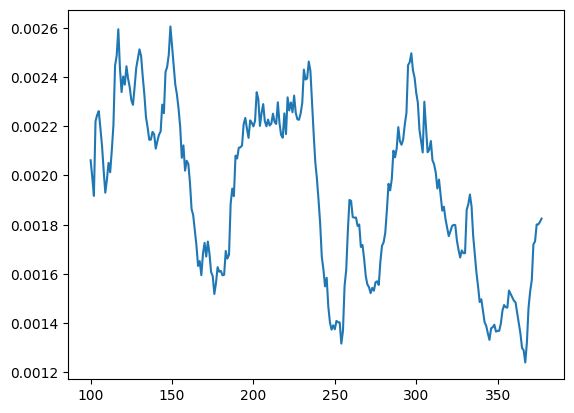

In [355]:
smooth = 1
x = np.arange(len(losses)/smooth)
y = torch.tensor(losses).view(smooth, -1).mean(0)
plt.plot(x[100:], y[100:])


In [6]:
def game_sim():
    snake = [(14, 14)]
    dataset = []
    moves = 0
    while True:
        dataset.append(snake.copy())
        while True:
            apple = (int(np.random.rand(1) * board_size), int(np.random.rand(1) * board_size))
            if apple not in snake:
                break
        pathington = BFS(snake[0], apple, snake, 1)
        if len(pathington) == 0:
            return dataset, moves, len(snake)
        path = pathington[0]
        moves += len(path)
        path = path + snake
        snake.append((0, 0))
        for i, piece in enumerate(snake):
            snake[i] = path[i]

In [7]:
def get_neighbors(p, snake, distance):
    reduced = snake.copy()
    for i in range(distance):
        if len(reduced) > 0:
            reduced.remove(reduced[len(reduced) - 1])
    if p[0] + 1 < board_size and (p[0] + 1, p[1]) not in reduced:
        top = (p[0] + 1, p[1])
    else:
        top = None
    if p[0] - 1 > -1 and (p[0] - 1, p[1]) not in reduced:
        bottom = (p[0] - 1, p[1])
    else:
        bottom = None
    if p[1] + 1 < board_size and (p[0], p[1] + 1) not in reduced:
        right = (p[0], p[1] + 1)
    else:
        right = None
    if p[1] - 1 > -1 and (p[0], p[1] - 1) not in reduced:
        left = (p[0], p[1] - 1)
    else:
        left = None
    return top, right, bottom, left

In [8]:
class Node:
    def __init__(self, value, depth, path, h): # depth is inherently g score
        self.value = value
        self.path = path + [value]
        self.depth = depth
        self.h = h
    def __eq__(self, other):
        if self.value == other.value and self.depth == other.depth:
            return True
        else:
            return False

In [9]:
def BFS(start, end, snake, n):
    paths = []
    tree = [Node(start, 0, [], euclidian(start, end))]
    while len(tree) != 0:
        min_val = 1000000
        min_node = None
        for i in tree:
            if i.depth + i.h < min_val:
                min_val = i.depth + i.h
                min_node = i
        current = min_node
        if current.value == end:
            paths.append(list(reversed(current.path)))
        if len(paths) == n:
            return paths
        neighbors = get_neighbors(current.value, snake, current.depth)
        for neighbor in neighbors:
            if neighbor is not None:
                node = Node(neighbor, current.depth + 1, current.path, euclidian(neighbor, end))
                if node not in tree and neighbor not in current.path:
                    tree.append(node)
        tree.remove(current)
    return paths

In [10]:
def euclidian(a, b):
    x = abs(a[0] - b[0])
    y = abs(a[1] - b[1])
    return np.sqrt(x**2 + y**2)